# <center> <font color = 'royalblue'> From Playboy Cricketer to Islamist Politician? <br><br> An Analysis of Imran Khan’s Tweets Pre and Post Aug 2018 </font> </center>
## <center> Author: Maryam Khalid Shah </center>


### Theory of Interest

One aspect of exploring whether Imran Khan is using religion strategically i.e. to appeal to the people, is to analyze his “religious tweets” (i.e. tweets with any religious elements) over time. It is important to note here that by religious tweets I do not mean tweets that only talk about religion. I also mean tweets that use religious phrases and elements e.g. a tweet talking about the Kashmir issue containing religious words. The reason why I want to consider the latter as well is because even the use of a few religious terms in otherwise non-religious tweets still signals to readers that religion is important to Imran Khan. 

**1. Has the number of Imran Khan’s tweets that contain religious (specifically Islamic) elements increased over time?** <br>
**2. Have Imran Khan’s (religious) tweets become more religious over time?**

The first question is not differentiating between tweets that are more versus less religious. Instead, it is looking at all tweets that contain Islamic elements, and determining whether the amount of these Islamic tweets have increased over time?

The second question is looking at whether the religious elements within his religious tweets have become more pronounced. Specifically, has the number of Islamic terms within his religious tweets increased over time? Religious tweets here would be considered to be all tweets that contain religious elements, not only tweets in which religion is the dominant element/topic. 
 
Even though Imran used religious statements prior to getting elected, I would be interested to see if his tweets became more religious after he became Prime Minister as compared to his pre-office tweets. Therefore, in addition to looking at his tweets over time generally, I will compare his tweets before he assumed office (August 2018) and his tweets as Prime Minister.


In [1]:
# import modules
import os
import pandas as pd
# from langdetect import detect
import langdetect as ld
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import word_tokenize, FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import random
from sklearn.model_selection import train_test_split
from sklearn import svm
import sklearn.metrics as m
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.utils import resample
from plotnine import *

## <font color='royalblue'> <center> Data Collection

Imran Khan became Prime Minister in August 2018. In order to look at equal time frames before and after he became PM, I will look at his tweets from August 2018 to May 2022 (3 years and 9 monts), and from December 2014 to August 2018 (3 years and 9 months).

Grab all tweets by Imran Khan (@ImranKhanPTI) since Dec 2014 till May 2022.

Guidance obtained from: https://betterprogramming.pub/how-to-scrape-tweets-with-snscrape-90124ed006af

In [752]:
# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --since 2014-12-01 twitter-search 'from:imrankhanpti'> imran_2014_onwards.json")

0

In [753]:
# Reads the json generated from the CLI commands above and creates a pandas dataframe
tweets_df = pd.read_json('imran_2014_onwards.json', lines=True)

In [754]:
# check shape
tweets_df.shape

(5259, 28)

In [755]:
# check head
tweets_df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/152334...,2022-05-08 16:56:34+00:00,پاکستان تحریک انصاف کی حکومت کے ”ٹین بلین ٹریز...,پاکستان تحریک انصاف کی حکومت کے ”ٹین بلین ٹریز...,1523346130506899457,"{'_type': 'snscrape.modules.twitter.User', 'us...",2204,15828,44658,...,None,NaN,None,NaN,None,None,NaN,NaN,None,None
1,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/152333...,2022-05-08 16:31:57+00:00,پاکستان کی منتخب جمہوری حکومت کو گرانے کی بیرو...,پاکستان کی منتخب جمہوری حکومت کو گرانے کی بیرو...,1523339933510881281,"{'_type': 'snscrape.modules.twitter.User', 'us...",2453,18383,46380,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,NaN,NaN,[امپورٹڈ__حکومت__نامنظور],None
2,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/152331...,2022-05-08 14:42:31+00:00,I want to thank all the people at our Abbotaba...,I want to thank all the people at our Abbotaba...,1523312393907884032,"{'_type': 'snscrape.modules.twitter.User', 'us...",3934,27498,68153,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,NaN,NaN,[امپورٹڈ__حکومت__نامنظور],None
3,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/152328...,2022-05-08 12:51:23+00:00,Thanks to PTI govt's Ten Billion Trees tsunami...,Thanks to PTI govt's Ten Billion Trees tsunami...,1523284429887606786,"{'_type': 'snscrape.modules.twitter.User', 'us...",1706,15975,46378,...,None,NaN,None,NaN,None,None,NaN,NaN,None,None
4,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/152320...,2022-05-08 07:39:13+00:00,اپنے شہریوں خصوصاً خواتین اور طالبات کو نقل و ...,اپنے شہریوں خصوصاً خواتین اور طالبات کو نقل و ...,1523205867612475393,"{'_type': 'snscrape.modules.twitter.User', 'us...",1048,10530,32970,...,None,NaN,None,NaN,None,None,NaN,NaN,None,None


Most of Imran Khan's tweets as Prime Minister have been in English and Urdu i.e. he would post a tweet in English, and then would post the same tweet in Urdu. This can be seen in a sample of his latest tweets that I am detecting the language for below (*ur* stands for Urdu).

In [756]:
for i in list(tweets_df.content.values)[1:10]:
    print(ld.detect(i))

ur
en
en
ur
en
ur
en
ur
en


For this project, I only need his English tweets.

In [757]:
# create function to store only english tweets

def is_en(x):
    """function to detect english text"""
    try:
        return ld.detect(x) == 'en'
    except:
        return False

In [758]:
# apply function and store as new dataframe
df = tweets_df[tweets_df['content'].apply(is_en)]

# check shape
df.shape

(3911, 28)

These English tweets may still include Urdu hashtags and website URLs, as can be seen in a tweet printed below. Moreover, the English tweets may contain Urdu words written in Roman English e.g. in the tweet below, the word *jalsa* is used, which is the Urdu word for a rally. 

We can also see that the scraped tweet includes $'&amp;'$ where there should only have been '&' (confirmed by looking at the original tweet).

In [759]:
df.content.values[4]

'He is an exceptional professional who combined passion, competence and patriotism. My worry is that his departure might adversely effect our critical Decade of Dams programme. #امپورٹڈ__حکومت__نامنظور https://t.co/Jh1NJRejgq'

## <font color='royalblue'> <center> Data Cleaning

Let's start with basic data cleaning:
- remove numbers
- remove URLs
- remove Urdu hashtags
- remove mentions
- transform text to lowercase
- replace Roman Urdu words with their English translation
- expand abbreviated words
- replace  &amp;  with  & 

#### Remove numbers

Removing all numeric values in the data.

In [764]:
# replace all numbers with 'num'
df["content"] = df["content"].replace('\d+', '', regex=True)

#### Remove URLs

URLs (or Uniform Resource Locators) in a text are references to a location on the web, but do not provide any additional information. We thus, remove these too using the library named re, which provides regular expression matching operations.

We take our sample text and analyse each word, removing words or strings starting with http.

In [765]:
def remove_url(text_data):
    """remove_url takes raw text and removes urls from the text"""
    
    return re.sub(r"http\S+", "", text_data)

# check
print(remove_url(df.content.values[4]))

He is an exceptional professional who combined passion, competence and patriotism. My worry is that his departure might adversely effect our critical Decade of Dams programme. #امپورٹڈ__حکومت__نامنظور 


In [766]:
# store content column as list
content_list = list(df['content'].values)

In [767]:
# create empty list to store processed text
processed_content = []

for i in content_list:
    processed_text = remove_url(i)
    processed_content.append(processed_text)

In [768]:
# replace content column with processed text
df['content'] = processed_content

# view
df['content'].values[1:5]

array(["Thanks to PTI govt's Ten Billion Trees tsunami, an olive revolution took place and soon we will produce enough olive oil for export.\n",
       'I commend KP govt for providing international standards quality public transport facility for its citizens, esp women &amp; female students. This will also facilitate women &amp; girls in continuing their education.\n',
       'My appeal esp to our Overseas Pakistanis at this defining moment for Pakistan. #امپورٹڈ__حکومت__نامنظور \n',
       'He is an exceptional professional who combined passion, competence and patriotism. My worry is that his departure might adversely effect our critical Decade of Dams programme. #امپورٹڈ__حکومت__نامنظور '],
      dtype=object)

#### Remove Urdu hashtags

Even though only English tweets were selected, some still include Urdu hashtags that need to be removed. I will first identify which tweets have Urdu hashtags, then remove the Urdu hashtags from those tweets.

In [769]:
# create list to store hashtag language
hashtag_lang = []

# check Urdu hashtags
for i in df.hashtags.values:
    if i is not None:
        hashtag_lang.append(ld.detect(i[0]))
    else:
        hashtag_lang.append('none')
        
# view list
hashtag_lang[0:10]

['ur', 'none', 'none', 'ur', 'ur', 'ur', 'none', 'none', 'none', 'none']

Upon inspecting the hashtag language list, I found other languages as well apart from Urdu and English. However, I manually looked at those hashtags and found that they are English ones. So I only need to remove Urdu words from the tweets now. 

In [770]:
# create empty list to store results
en_tweets = []

for i in range(len(df)):
    if hashtag_lang[i] == 'ur':
        cleaned_tweet = re.sub(df.hashtags.values[i][0], "", df['content'].values[i])
        en_tweets.append(cleaned_tweet)
    else:
        en_tweets.append(df['content'].values[i])


In [771]:
# update content column
df['content'] = en_tweets

# view
df['content'].values[1:5]

array(["Thanks to PTI govt's Ten Billion Trees tsunami, an olive revolution took place and soon we will produce enough olive oil for export.\n",
       'I commend KP govt for providing international standards quality public transport facility for its citizens, esp women &amp; female students. This will also facilitate women &amp; girls in continuing their education.\n',
       'My appeal esp to our Overseas Pakistanis at this defining moment for Pakistan. # \n',
       'He is an exceptional professional who combined passion, competence and patriotism. My worry is that his departure might adversely effect our critical Decade of Dams programme. # '],
      dtype=object)

#### Remove mentions

In [772]:
# define function
def remove_mentions(text_data):
    """remove_mentions takes raw text and removes mentions from the text."""
    
    return re.sub(r"@\S+", "", text_data)


In [773]:
# store content column as list
content_list = list(df['content'].values)

In [774]:
# create empty list to store processed text
processed_content = []

for i in content_list:
    processed_text = remove_mentions(i)
    processed_content.append(processed_text)

In [775]:
# replace content column with processed text
df['content'] = processed_content


#### Make content column lowercase

In [776]:
# make content column lowercase
df["content"] = df["content"].str.lower() 

#### Replace Roman Urdu words with their English translation

After manually going through a lot of tweets, a couple of Roman Urdu words were found. In the table below, I list the Roman Urdu word, and the word that I am going to replace it with (its English translation). 

| Urdu Word | English Translation |
| --------- | ------------------- |
| jalsa     |      protest        |
| haqeeqi   |        real         |
| kutchery  |       court         |
| junoon    |       enthusiasm         |
| mujhe kyun nikala| why was I removed |
| ehtesab |  accountability |
| desi    | local |
| walaiti | foreigner |
| naya    | new |
| jalsagah | meeting place |
| jazba    | spirit |
| daal | lentils |
| atta | flour |
| ghee | oil |
| shuhada | martyrs |
| shahadat | martyrdom |

In [777]:
# replace Urdu words
df["content"] = df["content"].replace('\\bjalsa\\b', 'protest', regex=True)
df["content"] = df["content"].replace('haqeeqi', 'real', regex=True)
df["content"] = df["content"].replace('kutchery', 'court', regex=True)
df["content"] = df["content"].replace('junoon', 'enthusiasm', regex=True)
df["content"] = df["content"].replace('mujhe kyun nikala', 'why was i removed', regex=True)
df["content"] = df["content"].replace('ehtesab', 'accountability', regex=True)
df["content"] = df["content"].replace('\\bdesi\\b', 'local', regex=True)
df["content"] = df["content"].replace('walaiti', 'foreigner', regex=True)
df["content"] = df["content"].replace('\\bnaya\\b', 'new', regex=True)
df["content"] = df["content"].replace('\\bjalsagah\\b', 'meeting place', regex=True)
df["content"] = df["content"].replace('\\bjazba\\b', 'spirit', regex=True)
df["content"] = df["content"].replace('\\bdaal\\b', 'lentils', regex=True)
df["content"] = df["content"].replace('\\batta\\b', 'flour', regex=True)
df["content"] = df["content"].replace('\\bghee\\b', 'oil', regex=True)
df["content"] = df["content"].replace('\\bshuhada\\b', 'martyrs', regex=True)
df["content"] = df["content"].replace('\\bshahadat\\b', 'martyrdom', regex=True)


#### Expand abbreviated words

The tweets include many abbreviations - I've added them in the table below along with the full form of each word:

| Abbrevation | Actual Word |
| ----------- | ----------- |
| mtg | meeting |
| ppl | people |
| abt | about |
| int | international |
| pak | pakistan |
| govt | government |
| mbr | member |
| intl, int | international |
| approx | approximately |
| yr | year |
| yrs | years |
| acc | according |
| thru | through |
| shd | should |
| ag | against |
| pop | population |
| indep | independent |
| bn | billion |
| mth | month |
| mths| months|
| esp | especially |
| ldr | leader |
| rep | representative |
| reps | representatives |
| pol | political |
| delib | deliberate |
| mn | million |
| haq | truth |
| mtgs | meetings |
| bec | because |
| incl | including |
| ns | nawaz sharif |
| pm | prime minister |


I will be replacing the abbrevations with the actual words. I have written a regex expression that only transforms these stand alone abbreviations, and not words that contain the same letters e.g. I want 'pop' to be converted to population, but I don't want to transform the word *pop*ular.

In [778]:
# expand abbreviations
df["content"] = df["content"].replace('\\bmtg\\b', 'meeting', regex=True)
df["content"] = df["content"].replace('\\bppl\\b', 'people', regex=True)
df["content"] = df["content"].replace('\\babt\\b', 'about', regex=True)
df["content"] = df["content"].replace('\\bint\\b', 'international', regex=True)
df["content"] = df["content"].replace('\\bpak\\b', 'pakistan', regex=True)
df["content"] = df["content"].replace('\\bgovt\\b', 'government', regex=True)
df["content"] = df["content"].replace('\\bmbr\\b', 'member', regex=True)
df["content"] = df["content"].replace('\\bint\\b', 'international', regex=True)
df["content"] = df["content"].replace('\\bintl\\b', 'international', regex=True)
df["content"] = df["content"].replace('\\bapprox\\b', 'approximately', regex=True)
df["content"] = df["content"].replace('\\byr\\b', 'year', regex=True)
df["content"] = df["content"].replace('\\byrs\\b', 'years', regex=True)
df["content"] = df["content"].replace('\\bacc\\b', 'according', regex=True)
df["content"] = df["content"].replace('\\bthru\\b', 'through', regex=True)
df["content"] = df["content"].replace('\\bshd\\b', 'should', regex=True)
df["content"] = df["content"].replace('\\bag\\b', 'against', regex=True)
df["content"] = df["content"].replace('\\bpop\\b', 'population', regex=True)
df["content"] = df["content"].replace('\\bindep\\b', 'independent', regex=True)
df["content"] = df["content"].replace('\\bbn\\b', 'billion', regex=True)
df["content"] = df["content"].replace('\\bmth\\b', 'month', regex=True)
df["content"] = df["content"].replace('\\bmths\\b', 'months', regex=True)
df["content"] = df["content"].replace('\\besp\\b', 'especially', regex=True)
df["content"] = df["content"].replace('\\bldr\\b', 'leader', regex=True)
df["content"] = df["content"].replace('\\brep\\b', 'representative', regex=True)
df["content"] = df["content"].replace('\\breps\\b', 'representatives', regex=True)
df["content"] = df["content"].replace('\\brpol\\b', 'political', regex=True)
df["content"] = df["content"].replace('\\breps\\b', 'representatives', regex=True)
df["content"] = df["content"].replace('\\bdelib\\b', 'deliberate', regex=True)
df["content"] = df["content"].replace('\\bmn\\b', 'million', regex=True)
df["content"] = df["content"].replace('\\bhaq\\b', 'truth', regex=True)
df["content"] = df["content"].replace('\\bmtgs\\b', 'meetings', regex=True)
df["content"] = df["content"].replace('\\bbec\\b', 'because', regex=True)
df["content"] = df["content"].replace('\\bincl\\b', 'including', regex=True)
df["content"] = df["content"].replace('\\bns\\b', 'nawaz sharif', regex=True)
df["content"] = df["content"].replace('\\bpm\\b', 'prime minister', regex=True)

#### Replace $&amp;$ with $&$

In [779]:
# replace &amp; with &
df["content"] = df["content"].replace('&amp;', '&', regex=True)

### <center> <font color='royalblue'> Exploring the Text

In [780]:
text = " ".join(tweet for tweet in df.content)
print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 621423 words in the combination of all tweets.


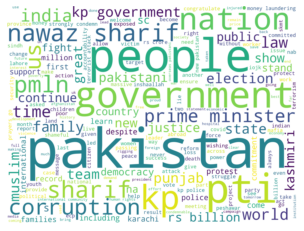

In [781]:
# Create stopword list:
stop_words = set(STOPWORDS)
stop_words.update(["one", "will", "want", "today", "must", "now", "especially", "saddened",
                  "thank", "day", "year", "congratulations", "made", "u", "n", "years", "ns"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=2000, height=1500).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The most common word in Imran Khan's tweets is Pakistan, followed by people, government, pti (the name of his political party), and Nawaz Sharif (his major political opponent). 

Religious (specifically Islamic words):

- martyred
- martyr
- martyrs
- martyring
- martyrdom
- karbala 
- imam hussain 
- baatil
- ummah
- inshaallah
- prophet
- riyasat-i-madina
- mashaallah
- madina
- sadiq
- ameen
- hazrat ali
- alhamdulillah
- allah
- fateha
- riyasat e madina


In order for phrases to be captured, I need to convert them to single words.
- Convert 'riyasat e madina' to 'riyasat-i-madina'. 
- 'hazrat-ali'
- 'imam-hussain'

In [782]:
df["content"] = df["content"].replace('\\briyasat e madina\\b', 'riyasat-i-madina', regex=True)
df["content"] = df["content"].replace('\\bhazrat ali\\b', 'hazrat-ali', regex=True)
df["content"] = df["content"].replace('\\bimam hussain\\b', 'imam-hussain', regex=True)

Lemmatize words related to martyrdom, since I want to add these words in the seed topic list.

In [783]:
df["content"] = df["content"].replace('\\bmartyred\\b', 'martyr', regex=True)
df["content"] = df["content"].replace('\\bmartyring\\b', 'martyr', regex=True)

In [784]:
# create list of tweets
tweets = list(df.content.values)

In [785]:
# set seed topic list
seed_topic_list = ["martyrdom", "martyr", "martyrs",
                   "karbala", "imam-hussain", "baatil", "ummah",
                   "inshaallah", "mashaallah", "prophet", "riyasat-i-madina",
                   "madina", "sadiq", "ameen", "hazrat-ali" ,
                   "alhamdulillah", "shahadat", "allah", "fateha", "shuhada"]


#### Research Question 1: Has the number of Imran Khan’s tweets that contain religious (specifically Islamic) elements increased over time?
The first question is not differentiating between tweets that are more versus less religious. Instead, it is looking at all tweets that contain Islamic elements, and determining whether the amount of these Islamic tweets have increased over time?

#### Research Question 2: Have Imran Khan’s (religious) tweets become more religious over time?

The second question is looking at whether the religious elements within his religious tweets have become more pronounced. Specifically, has the number of Islamic terms within his religious tweets increased over time? Religious tweets here would be considered to be all tweets that contain religious elements, not only tweets in which religion is the dominant element/topic.

In [786]:
# store the total number of words in each tweet in a new column
count = df.reset_index()['content'].str.split().str.len()
df['total_words'] = list(count.values)

# check
df.head(2)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,total_words
2,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/152331...,2022-05-08 14:42:31+00:00,i want to thank all the people at our abbotaba...,I want to thank all the people at our Abbotaba...,1523312393907884032,"{'_type': 'snscrape.modules.twitter.User', 'us...",3934,27498,68153,...,NaN,None,NaN,None,None,NaN,NaN,[امپورٹڈ__حکومت__نامنظور],None,37
3,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/152328...,2022-05-08 12:51:23+00:00,thanks to pti government's ten billion trees t...,Thanks to PTI govt's Ten Billion Trees tsunami...,1523284429887606786,"{'_type': 'snscrape.modules.twitter.User', 'us...",1706,15975,46378,...,NaN,None,NaN,None,None,NaN,NaN,None,None,23


In [787]:
### create binary variable to identify whether tweet is religious or not

# create empty list 
rel = []

for i in df['content']:
    if any(word in seed_topic_list for word in i.split()):
        rel.append(1)
    else:
        rel.append(0)

# check length
len(rel)

3911

In [788]:
# store as column
df['rel'] = rel

# view
df.head(2)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,total_words,rel
2,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/152331...,2022-05-08 14:42:31+00:00,i want to thank all the people at our abbotaba...,I want to thank all the people at our Abbotaba...,1523312393907884032,"{'_type': 'snscrape.modules.twitter.User', 'us...",3934,27498,68153,...,None,NaN,None,None,NaN,NaN,[امپورٹڈ__حکومت__نامنظور],None,37,0
3,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/152328...,2022-05-08 12:51:23+00:00,thanks to pti government's ten billion trees t...,Thanks to PTI govt's Ten Billion Trees tsunami...,1523284429887606786,"{'_type': 'snscrape.modules.twitter.User', 'us...",1706,15975,46378,...,None,NaN,None,None,NaN,NaN,None,None,23,0


In [789]:
### store number of religious terms in each tweet

# create function that returns word-frequency pairs
def wordListToFreqDict(wordlist):
    """Given a list of words, the function returns a dictionary of word-frequency pairs."""
    
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

In [790]:
# create empty list
rel_terms = []

for i in df['content']:
    mydict = wordListToFreqDict(i.split(' '))
    my_dict = dict((key,value) for key, value in mydict.items() if key in seed_topic_list)
    rel_terms.append(sum(my_dict.values()))
    
# check length
len(rel_terms)

3911

In [791]:
# store as dataframe column
df['rel_terms'] = rel_terms

# view
df.head(2)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,total_words,rel,rel_terms
2,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/152331...,2022-05-08 14:42:31+00:00,i want to thank all the people at our abbotaba...,I want to thank all the people at our Abbotaba...,1523312393907884032,"{'_type': 'snscrape.modules.twitter.User', 'us...",3934,27498,68153,...,NaN,None,None,NaN,NaN,[امپورٹڈ__حکومت__نامنظور],None,37,0,0
3,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/152328...,2022-05-08 12:51:23+00:00,thanks to pti government's ten billion trees t...,Thanks to PTI govt's Ten Billion Trees tsunami...,1523284429887606786,"{'_type': 'snscrape.modules.twitter.User', 'us...",1706,15975,46378,...,NaN,None,None,NaN,NaN,None,None,23,0,0


In [792]:
# reset index 
df = df.reset_index()

# check if rel_terms 0 where tweet classified as religious
df[(df.rel == 1)][df[(df.rel == 1)]['rel_terms'] == 0]

,index,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,total_words,rel,rel_terms
878,1731,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/115000...,2019-07-13 11:39:09+00:00,the poverty of the people is the actual cause ...,The poverty of the people is the actual cause ...,1150006746078830593,"{'_type': 'snscrape.modules.twitter.User', 'us...",2507,6543,...,NaN,None,None,NaN,NaN,None,None,50,1,0


In [793]:
# this tweet contains 1 religious term but because of a line separator was not split up into a separate word
df.iloc[878, df.columns.get_loc('rel_terms')] = 1

# check
df[df.index == 878]

,index,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,total_words,rel,rel_terms
878,1731,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/115000...,2019-07-13 11:39:09+00:00,the poverty of the people is the actual cause ...,The poverty of the people is the actual cause ...,1150006746078830593,"{'_type': 'snscrape.modules.twitter.User', 'us...",2507,6543,...,NaN,None,None,NaN,NaN,None,None,50,1,1


In [794]:
# store perc of tweet that is religious
df['perc_rel'] = (df['rel_terms'] / df['total_words'])*100

# view
df.head(2)

,index,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,total_words,rel,rel_terms,perc_rel
0,2,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/152331...,2022-05-08 14:42:31+00:00,i want to thank all the people at our abbotaba...,I want to thank all the people at our Abbotaba...,1523312393907884032,"{'_type': 'snscrape.modules.twitter.User', 'us...",3934,27498,...,None,None,NaN,NaN,[امپورٹڈ__حکومت__نامنظور],None,37,0,0,0.0
1,3,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/152328...,2022-05-08 12:51:23+00:00,thanks to pti government's ten billion trees t...,Thanks to PTI govt's Ten Billion Trees tsunami...,1523284429887606786,"{'_type': 'snscrape.modules.twitter.User', 'us...",1706,15975,...,None,None,NaN,NaN,None,None,23,0,0,0.0


In [795]:
# filter to rel tweets
rel_df = df[(df.rel == 1)]

# check length
len(rel_df)

171

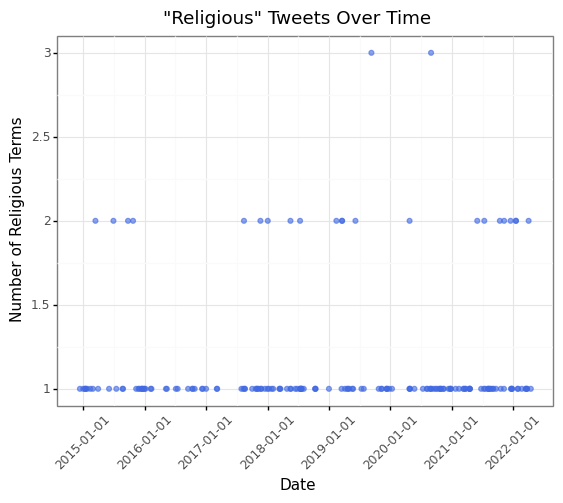

<ggplot: (133858234956)>

In [803]:
(ggplot(data=rel_df,
           mapping=aes(x='date', y='rel_terms'))
    + geom_point(color = 'royalblue',
                alpha = 0.6) +
 theme_bw() +
 labs(y = 'Number of Religious Terms',
     x = 'Date',
     title = '"Religious" Tweets Over Time') +
 theme(axis_text_x = element_text(angle = 45))
)

Usually tweets both pre and post 2018 included one religious term on average. Tweets with more than one religious term however increased post 2018. Let's look at exact numbers to see if the number of religious tweets before Aug 2018 was less than in the post Aug 2018 period.

In [808]:
# store month-year in a new column
rel_df['month_year'] = pd.to_datetime(rel_df['date']).dt.to_period('M')

# filter to pre Aug 2018
len(rel_df[rel_df.month_year < '2018-08'])

76

In [809]:
# filter to post Aug 2018
len(rel_df[rel_df.month_year >= '2018-08'])

95

There were more religious tweets post Aug 2018 as compared to pre Aug 2018.

Most tweets were not religious however, as can be seen in the violin plot below (the majority of the tweets are where the variable `rel` is equal to 0 (denoting not religious).

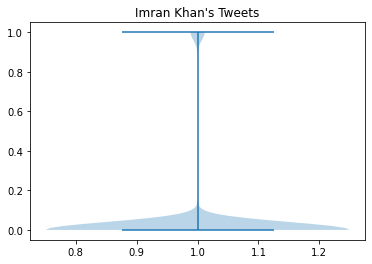

In [751]:
# extract figure and zxes instance
fig, ax = plt.subplots()

# create a plot
ax.violinplot([df.rel])

# add title
ax.set_title("Imran Khan's Tweets")
plt.show()

The plot above shows that most of Imran Khan's tweets across the 8 years that are being analyzed, were not religious/did not contain religious terms. 

What about the proportion of a tweet that was religious? How did that change over time? 

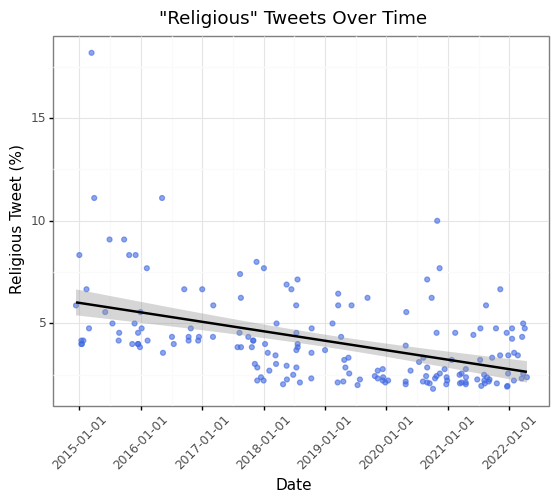

<ggplot: (133858362754)>

In [813]:
(ggplot(data=rel_df,
           mapping=aes(x='date', y='perc_rel'))
    + geom_point(color = 'royalblue',
                alpha = 0.6) +
 geom_smooth(method='lm')+
 theme_bw() +
 labs(y = 'Religious Tweet (%)',
     x = 'Date',
     title = '"Religious" Tweets Over Time') +
 theme(axis_text_x = element_text(angle = 45))
)

The plot above shows that over time, the proportion of religious terms in religious tweets decreased. Since we saw in one of the previous plots that the number of religious terms actually increased post 2018, a possible reason for this downward trend is lengthier tweets over time (leading to a low proportion of religious terms). Let's see if this is the case by plotting the length of tweets over time.

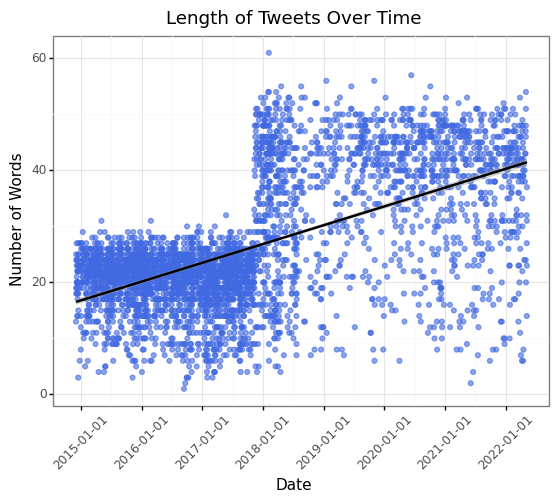

<ggplot: (133858385631)>

In [816]:
(ggplot(data=df,
           mapping=aes(x='date', y='total_words'))
    + geom_point(color = 'royalblue',
                alpha = 0.6) +
 geom_smooth(method='lm')+
 theme_bw() +
 labs(y = 'Number of Words',
     x = 'Date',
     title = 'Length of Tweets Over Time') +
 theme(axis_text_x = element_text(angle = 45))
)

The length of tweets generally increased close to 2018. The most likely reason for this is Twitter expanding its character count from 140 to 280 in November 2017.

Let's explore the data more generally now. 

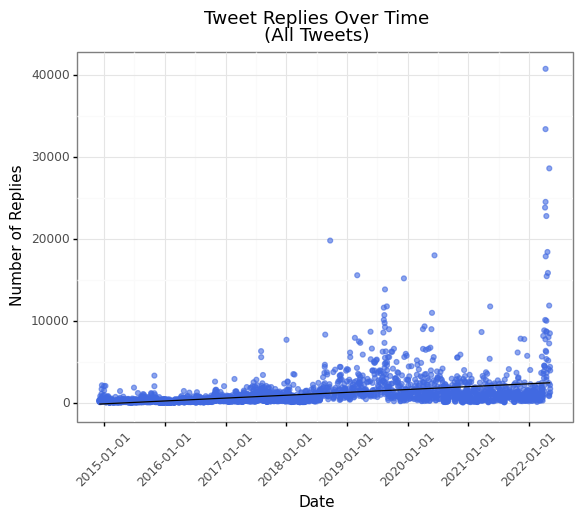

<ggplot: (133858432886)>

In [881]:
(ggplot(data=df,
           mapping=aes(x='date', y='replyCount'))
    + geom_point(color = 'royalblue',
                alpha = 0.6) +
 geom_smooth(method='lm', size = 0.5)+
 theme_bw() +
 labs(y = 'Number of Replies',
     x = 'Date',
     title = 'Tweet Replies Over Time\n(All Tweets)') +
 theme(axis_text_x = element_text(angle = 45))
)

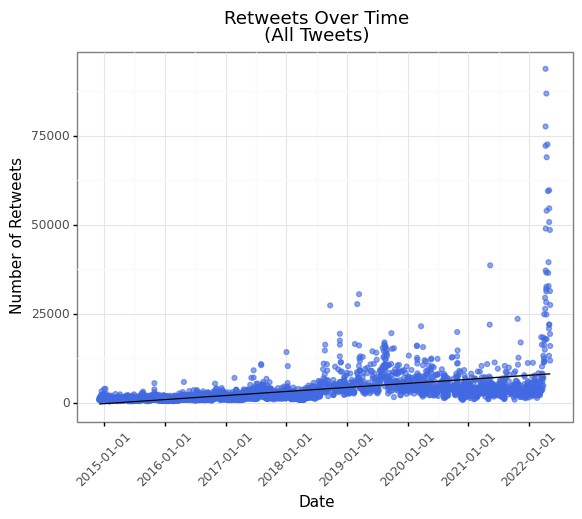

<ggplot: (133913986705)>

In [882]:
(ggplot(data=df,
           mapping=aes(x='date', y='retweetCount'))
    + geom_point(color = 'royalblue',
                alpha = 0.6) +
 geom_smooth(method='lm', size = 0.5)+
 theme_bw() +
 labs(y = 'Number of Retweets',
     x = 'Date',
     title = 'Retweets Over Time\n(All Tweets)') +
 theme(axis_text_x = element_text(angle = 45))
)

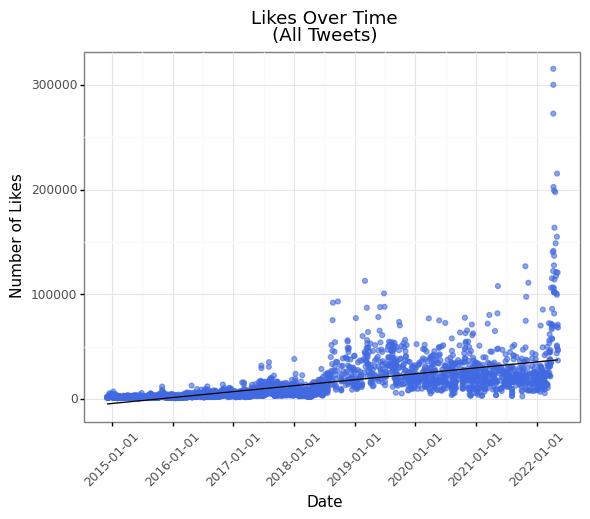

<ggplot: (133915800200)>

In [883]:
(ggplot(data=df,
           mapping=aes(x='date', y='likeCount'))
    + geom_point(color = 'royalblue',
                alpha = 0.6) +
 geom_smooth(method='lm', size = 0.5)+
 theme_bw() +
 labs(y = 'Number of Likes',
     x = 'Date',
     title = 'Likes Over Time\n(All Tweets)') +
 theme(axis_text_x = element_text(angle = 45))
)

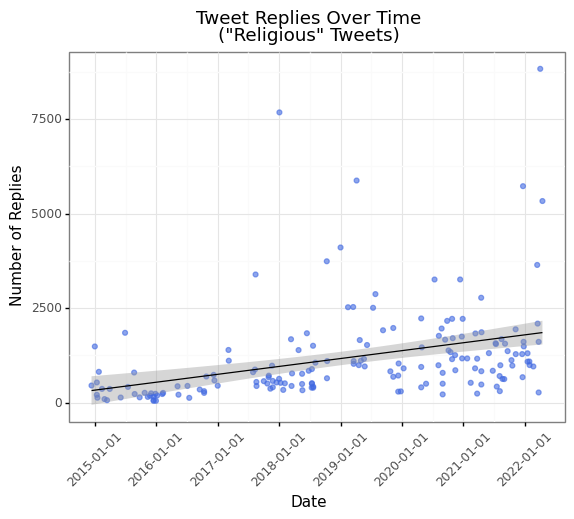

<ggplot: (133910421851)>

In [884]:
(ggplot(data=rel_df,
           mapping=aes(x='date', y='replyCount'))
    + geom_point(color = 'royalblue',
                alpha = 0.6) +
 geom_smooth(method='lm', size = 0.5)+
 theme_bw() +
 labs(y = 'Number of Replies',
     x = 'Date',
     title = 'Tweet Replies Over Time\n("Religious" Tweets)') +
 theme(axis_text_x = element_text(angle = 45))
)

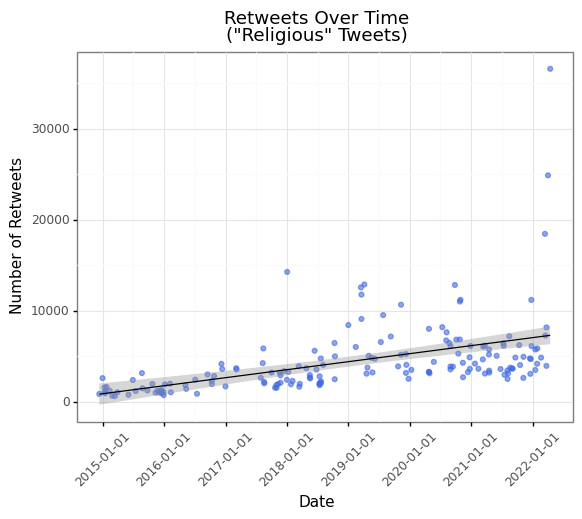

<ggplot: (133858326004)>

In [885]:
(ggplot(data=rel_df,
           mapping=aes(x='date', y='retweetCount'))
    + geom_point(color = 'royalblue',
                alpha = 0.6) +
 geom_smooth(method='lm', size = 0.5)+
 theme_bw() +
 labs(y = 'Number of Retweets',
     x = 'Date',
     title = 'Retweets Over Time\n("Religious" Tweets)') +
 theme(axis_text_x = element_text(angle = 45))
)

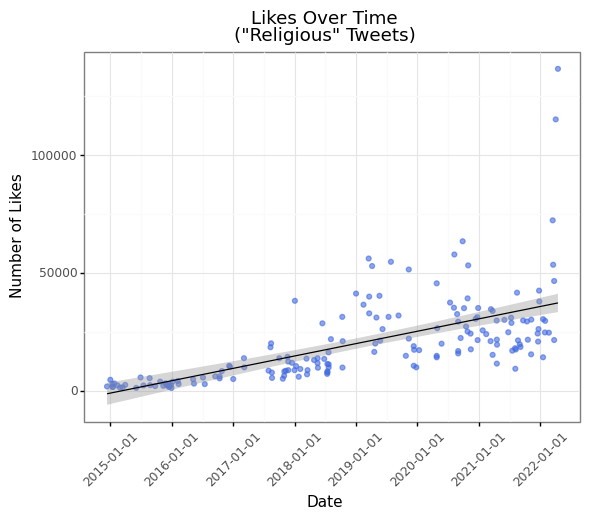

<ggplot: (133887928146)>

In [886]:
(ggplot(data=rel_df,
           mapping=aes(x='date', y='likeCount'))
    + geom_point(color = 'royalblue',
                alpha = 0.6) +
 geom_smooth(method='lm', size = 0.5)+
 theme_bw() +
 labs(y = 'Number of Likes',
     x = 'Date',
     title = 'Likes Over Time\n("Religious" Tweets)') +
 theme(axis_text_x = element_text(angle = 45))
)

The number of replies, retweets and likes increased over time, both for Imran Khan's tweets in general, and for his 'religious' tweets specifically.

### <center> <font color='royalblue'> Guided Topic Modeling

Guided Topic Modeling or Seeded Topic Modeling is a collection of techniques that guides the topic modeling approach by setting a number of seed topics in which the model will converge to. These techniques allow the user to set a pre-defined number of topic representations that are sure to be in documents. 

To model that bug, we can create a seed topic representation containing the relevant words. By defining those words, a Guided Topic Modeling approach will try to converge at least one topic to those words.

By defining the topics BERTopic is more likely to model the defined seeded topics. However, BERTopic is merely nudged towards creating those topics. In practice, if the seeded topics do not exist or might be divided into smaller topics, then they will not be modeled. Thus, seed topics need to be accurate in order to accurately converge towards them.

https://maartengr.github.io/BERTopic/getting_started/guided/guided.html#example

In [817]:
# store topic model
topic_model = BERTopic(seed_topic_list=seed_topic_list)

# fit topic model
topics, probs = topic_model.fit_transform(tweets)

# save topic model
topic_model.save("imran_khan_model")

In [818]:
# load trained BERTopic model
topic_model = BERTopic.load("imran_khan_model")

In [819]:
# access frequent topics
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,1447,-1_of_the_to_in
1,0,374,0_sharif_nawaz_sharifs_money
2,1,211,1_indian_kashmiris_india_kashmiri
3,2,179,2_pti_ptis_party_will
4,3,121,3_saddened_passing_condolences_family
5,4,119,4_cricket_team_congratulations_pakistan
6,5,103,5_attack_condemn_strongly_terrorist
7,6,76,6_police_kp_force_professional
8,7,71,7_rs_crores_skmt_skmth
9,8,59,8_corruption_institutions_corrupt_wealth


In [827]:
topic_model.visualize_barchart(topics = [23,24,25,26,27,28,29,30], n_words = 9) 

I visualized all topics (till topic 30), which is why you can view the last set of topics visualized in order to interpret them.

- Topic 0 is about Imran Khan's main political opponent, Nawaz Sharif - who has been accused of money laundering, and was mentioned in the panama papers that were leaked.
- Topic 1 is about India (Pakistan's main 'enemy') and the Kashmir issue (Kashmir is a piece of land that Pakistanis and Indians have been figting over since 1947).
- Topic 2 is about Imran Khan's own political party, PTI.
- Topic 3 captures the condolences by Imran Khan on people passing away.
- Topic 4 is about the Pakistan cricket team.
- Topic 5 is captures condemnations of terrorist attacks.
- Topic 6 is about kp (a province in Pakistan where Imran Khan had a majority) and the police force there.
- Topic 7 is about Imran Khan's hospital, SKMT, and the money people have donated for it.
- Topic 8 is about corruption.
- Topic 9 is about protests.
- Topic 10 is capturing messages of congratulations.
- Topic 11 is about the major opposing political party, pmln.
- Topic 12 is about votes.
- Topic 13 is about tourism in Pakistan.
- Topic 14 is about the media.
- Topic 15 is capturing Eid wishes.
- Topic 16 is about the billion trees plantation project.
- Topic 17 is about remittances by foreign Pakistanis.
- Topic 18 is about Punjab (a province in Pakistan) police.
- Topic 19 is about the future of Pakistan.
- Topic 20 is about islamophobia.
- Topic 21 also captures condemnations of terrorist attacks
- Topic 22 seems to captures quotes.
- Topic 23 is about the cancer hospital in SKMT.
- Topic 24 is about the founder of Pakistan, Quaid-e-Azam Mohammad Ali Jinnah, and his vision for the country.
- Topic 25 is capturing the wishes for the minorities in Pakistan (Hindus, Sikhs).
- Topic 26 is about Pakistan's covid response.
- Topic 27 is about US wars.
- Topic 28 is 
- Topic 29 is about the education in kp (province in Pakistan).
- Topic 30 captures the religious elements (this is the topic that BERTopic was nudged to create).

In [821]:
# view the topic that we guided the model to create
topic_model.visualize_barchart(topics = [30], n_words = 10) 

In [828]:
# store topic frequency
freq_topics = topic_model.get_topic_info().iloc[1: , :] # remove row with outliers (where Topic = -1)

In [829]:
# visualize all topics 
topic_model.visualize_topics()

In [830]:
topic_model.visualize_heatmap()

A heatmap shows the similarity between topics (based on the cosine similarity matrix between topic embeddings). Looking at the heatmap above, we can see that the topic capturing religious/Islamic terms is the most similar to the one about Islamophobia (similarity score of 0.76).

I will be fitting the model to again to access probs so that I can analyze the percentage contribution of the “religion/Islam” topic in tweets where this is the dominant topic.


In [1050]:
# store topic model
topic_model = BERTopic(seed_topic_list=seed_topic_list)

# fit topic model
topics, probs = topic_model.fit_transform(tweets)

In [1055]:
# create copy of df
df4 = df.copy()

# store probs and topics
df4['probs'] = probs
df4['topics'] = topics

# filter to our topic of interest
mini_df = df4[df4.topics == 32]
mini_df.head()

,index,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,coordinates,place,hashtags,cashtags,total_words,rel,rel_terms,perc_rel,probs,topics
39,78,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/151030...,2022-04-02 17:10:05+00:00,"in karbala, facing an enemy that far outnumber...","In Karbala, facing an enemy that far outnumber...",1510303568640679937,"{'_type': 'snscrape.modules.twitter.User', 'us...",8826,24875,...,NaN,NaN,None,None,42,1,2,4.761905,0.639267,32
173,343,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/145755...,2021-11-08 03:51:09+00:00,our beloved prophet pbuh first raised the mora...,Our beloved Prophet PBUH first raised the mora...,1457556270144176133,"{'_type': 'snscrape.modules.twitter.User', 'us...",1282,4920,...,NaN,NaN,None,None,30,1,2,6.666667,1.000000,32
193,383,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/144830...,2021-10-13 15:10:48+00:00,almost years ago our prophet pbuh emphasised ...,Almost 1500 years ago our Prophet PBUH emphasi...,1448305225006190596,"{'_type': 'snscrape.modules.twitter.User', 'us...",1122,6208,...,NaN,NaN,None,None,42,1,2,4.761905,1.000000,32
501,989,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/132166...,2020-10-29 04:25:13+00:00,one of my favourite quotes about our beloved p...,One of my favourite quotes about our beloved P...,1321669394540294146,"{'_type': 'snscrape.modules.twitter.User', 'us...",1703,11184,...,NaN,NaN,None,None,10,1,1,10.000000,1.000000,32
506,996,snscrape.modules.twitter.Tweet,https://twitter.com/ImranKhanPTI/status/132032...,2020-10-25 11:04:18+00:00,what i had said in the unga last year as to wh...,What I had said in the UNGA last year as to wh...,1320320275943202817,"{'_type': 'snscrape.modules.twitter.User', 'us...",2215,11004,...,NaN,NaN,None,None,22,1,1,4.545455,0.500059,32


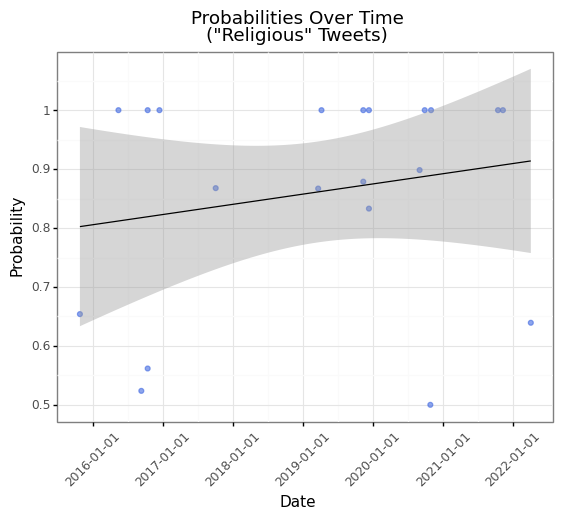

<ggplot: (133858475876)>

In [1056]:
# view probs over time
(ggplot(data=mini_df,
           mapping=aes(x='date', y='probs'))
    + geom_point(color = 'royalblue',
                alpha = 0.6) +
 geom_smooth(method='lm', size = 0.5)+
 theme_bw() +
 labs(y = 'Probability',
     x = 'Date',
     title = 'Probabilities Over Time\n("Religious" Tweets)') +
 theme(axis_text_x = element_text(angle = 45))
)

Not enough tweets (only 20) with the dominant topic of interest. Even though the probability of a tweet having the 'religious' topic increased over time, we don't have enough data to fully support this trend. 

### <center> <font color='royalblue'> Dynamic Topic Model 

In [831]:
#remove missing values in content col
df2 = df.dropna(how = 'any', subset = ['content'])

# check if dataframe has any missing values in the date column
df2.isnull().sum()

index                  0
_type                  0
url                    0
date                   0
content                0
renderedContent        0
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
outlinks            3246
tcooutlinks         3246
media               3227
retweetedTweet      3911
quotedTweet         3587
inReplyToTweetId    3662
inReplyToUser       3662
mentionedUsers      3857
coordinates         3911
place               3911
hashtags            3719
cashtags            3908
total_words            0
rel                    0
rel_terms              0
perc_rel               0
dtype: int64

#### Has the number of Imran Khan’s tweets that contain religious (specifically Islamic) elements increased over time?

The first question is not differentiating between tweets that are more versus less religious. Instead, it is looking at all tweets that contain Islamic elements, and determining whether the amount of these Islamic tweets have increased over time?

In [832]:
# store date column as list
timestamps = df2.date.to_list()

# check length
len(timestamps)

3911

In [833]:
# store tweet text data as list
tweet_text_list = df2.content.tolist()

# check length
len(tweet_text_list)

3911

In [834]:
# fit model again 
topics, probs = topic_model.fit_transform(tweet_text_list)

# save topic model
topic_model.save("imran_khan_model_dynamic")

In [835]:
# load trained BERTopic model
topic_model = BERTopic.load("imran_khan_model_dynamic")

# check length of topics
len(topics)

3911

In [836]:
# generate the topic representations at each timestamp for each topic 
topics_over_time = topic_model.topics_over_time(tweet_text_list, topics, timestamps)

In [838]:
# access topics
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,1427,-1_of_the_to_in
1,0,350,0_nawaz_sharif_sharifs_money
2,1,211,1_indian_kashmiris_india_kashmiri
3,2,210,2_pti_ptis_party_vote
4,3,123,3_cricket_team_congratulations_pakistan
5,4,117,4_saddened_condolences_family_passing
6,5,101,5_ecp_na_nadra_jc
7,6,75,6_police_kp_force_professional
8,7,70,7_remittances_year_deficit_million
9,8,66,8_rs_crores_skmt_skmth


In [847]:
# view topics with some movement over time (expcept for topic 1 which has too much movement and makes it hard to view others)
topic_model.visualize_topics_over_time(topics_over_time, topics = [3,7,9,17,27,29,31,49])


There was a spike in our topic of interest (Topic 31) between mid-2019 till 2020. This coincides with the spike in topic 27 (about islamophobia). I am curious to see that if I do not guide the BERTopic model, do will topics 31 and 27 essentially converge into one topic?

### <center> <font color='royalblue'> Topic Modeling

In [848]:
# store topic model
topic_model = BERTopic()

# fit topic model
topics, probs = topic_model.fit_transform(tweets)

# save topic model
topic_model.save("imran_khan_model_2")

In [849]:
# load trained BERTopic model
topic_model = BERTopic.load("imran_khan_model_2")

In [854]:
# access frequent topics
topic_model.get_topic_info()[:30]

,Topic,Count,Name
0,-1,1311,-1_the_of_in_to
1,0,382,0_sharif_nawaz_sharifs_money
2,1,212,1_indian_kashmiris_india_kashmiri
3,2,127,2_cricket_team_congratulations_pakistan
4,3,124,3_pti_party_ptis_will
5,4,120,4_saddened_passing_condolences_family
6,5,119,5_ecp_na_nadra_rigging
7,6,81,6_police_kp_force_professional
8,7,77,7_protest_thank_crowd_people
9,8,72,8_congratulations_congratulate_forward_look


In [855]:
# view topic of interest 
topic_model.visualize_barchart(topics = [11], n_words = 10) 

As suspected, without guiding the topic model, it creates one topic that captures all Islamic terms. This does make sense, however the reason why I did not want to include the word 'muslims' and 'islam' in my seed topic list is because the word 'muslim' is a more generic word e.g. 'Eid Mubarak to all muslims' is equivalent to 'Merry Christmas to all Christians'. I therefore specified 'religious/Islamic' terms as those that mostly resonate with only the Muslims (in Pakistan) without having to specify the audience - this includes mentioning Imam Hussain or the Holy Prophet PBUH, or using Arabic Islamic words like baatil (falsehood). 

Let's see this topic over time.

In [856]:
# fit model again 
topics, probs = topic_model.fit_transform(tweet_text_list)

# save topic model
topic_model.save("imran_khan_model_dynamic_2")

In [857]:
# load trained BERTopic model
topic_model = BERTopic.load("imran_khan_model_dynamic_2")

# check length of topics
len(topics)

3911

In [858]:
# generate the topic representations at each timestamp for each topic 
topics_over_time = topic_model.topics_over_time(tweet_text_list, topics, timestamps)

In [862]:
# view topics with some movement over time (expcept for topic 1 which has too much movement and makes it hard to view others)
topic_model.visualize_topics_over_time(topics_over_time, topics = [27])

We see the same peak that we saw earlier with the guided topic model i.e. tweets about Islam or tweets containing Islamic terminology increased in the first quarter of 2019 till just after mid-2019.

With topic modeling and exploratory data analysis combined, both of the two research questions that I set out to answer have been answered. I wanted to explore whether I can successfully created a guided topic using LDA, and compare results/ease of method, but I was unable to install the guidedlda package (https://github.com/MaartenGr/BERTopic). Instead, I will run some text classification models.

**BERTopic Citation:**

@article{grootendorst2022bertopic,<br>
  title={BERTopic: Neural topic modeling with a class-based TF-IDF procedure}, <br>
  author={Grootendorst, Maarten}, <br>
  journal={arXiv preprint arXiv:2203.05794}, <br>
  year={2022} <br>
}

### <font color='royalblue'> <center> Text Classification Models

***Question: Given the content of Imran Khan's tweets, can we predict whether his tweet would be "religious"/Islamic?***

In [887]:
# check for missing values
df.isnull().sum()

index                  0
_type                  0
url                    0
date                   0
content                0
renderedContent        0
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
outlinks            3246
tcooutlinks         3246
media               3227
retweetedTweet      3911
quotedTweet         3587
inReplyToTweetId    3662
inReplyToUser       3662
mentionedUsers      3857
coordinates         3911
place               3911
hashtags            3719
cashtags            3908
total_words            0
rel                    0
rel_terms              0
perc_rel               0
dtype: int64

SVCs are not effective at imbalanced classification, and our data is highly imbalanced as only a few tweets are 'religious'. Therefore, I will be undersampling the majority class manually. I wanted to try another method and use SMOTE to oversample the minority class, but even though I have used SMOTE before, I couldn't figure out how to apply to it a text classification problem. Will probably look into this later. 

In [1057]:
# undersample majority class
df3 = df.copy()

# separate minority and majority classes
majority_class = df3[df3.rel==0]
minority_class = df3[df3.rel==1]

# downsample majority
majority_downsampled = resample(majority_class,
                                replace = False, # sample without replacement
                                n_samples = len(minority_class), # match number in minority class
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([majority_downsampled, minority_class])

# checking counts
downsampled.rel.value_counts()

0    171
1    171
Name: rel, dtype: int64

#### For $x$, use `content`
#### For $y$, use the binary variable `rel`

In [1058]:
# store target and predictor
y = downsampled[['rel']]
X = downsampled[['content']]

# split data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y , test_size = .25, random_state = 123)

In [1059]:
# check training and test data shapes
print(train_X.shape[0]/downsampled.shape[0])
print(test_X.shape[0]/downsampled.shape[0])

0.7485380116959064
0.25146198830409355


#### Training data

In [1060]:
# store training data as a list
training_X = train_X.content.tolist()

# check length
len(training_X)

256

In [1061]:
# check train_y length
len(train_y)

256

In [1062]:
# store training target as numpy array
training_target = train_y.rel.values

# check length
len(training_target)

256

#### Test data

In [1063]:
# store test data as a list
test_x = test_X.content.tolist()

# check length
len(test_x)

86

In [1064]:
# check test_y length
len(test_y)

86

In [1065]:
# store test target as numpy array
test_target = test_y.rel.values

# check length
len(test_target)

86

#### Preprocessing Steps:

Pre-processing text using CountVectorizer():
- removing English stop words in order to remove the 'low-level' information in the text and focus more on the important information.
- converting all words to lowercase (done already) - assumption is that the meaning and significance of a lowercase word is the same as when that word is in uppercase or capitalized. This will help remove noise.
- ngram_range set to 1,2 i.e. capturing both unigrams and bigrams since the tweets often have names/terms that are bigrams e.g. prime minister. 
- min_df set to 5 i.e. rare words that appear in less than 5 documents will be ignored.
- max_df set to 0.9 i.e. words that appear in more than 90% of the documents will be ignored since they are not adding much to a specific document.

Using TfidfTransformer():
- Term frequencies calculated to overcome the discrepancies with using occurence count for differently sized documents. 
- Downscaled weights for words that occur in many documents and therefore do not add a lot of information than those that occur in a smaller share of the corpus (tf-idf)


### <center> <font color='royalblue'> Support Vector Classification (SVC)

In [1066]:
# create pipeline
svc_text_clf = Pipeline([('vect', CountVectorizer(stop_words = "english",
                                              lowercase = True,
                                              ngram_range = (1,2), # lower bound,upper bound: 1,2 unigrams and bigrams
                                              min_df = 5, # ignore rare words (appear in less than 5 documents)
                                              max_df = 0.9)), # ignore common words (appear in more than 90% of documents)
                     ('tfidf', TfidfTransformer()), 
                     ('clf', svm.SVC()),]) # SVC Classifier

# train the model
svc_text_clf.fit(training_X, training_target)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.9, min_df=5, ngram_range=(1, 2),
                                 stop_words='english')),
                ('tfidf', TfidfTransformer()), ('clf', SVC())])

In [1067]:
predicted = svc_text_clf.predict(test_x)
np.mean(predicted == test_target)

0.8488372093023255

In [1068]:
print('Accuracy score:', m.accuracy_score(test_target,predicted))
print("Precision:", m.precision_score(test_target, predicted))
print('F1 score: ', m.f1_score(test_target, predicted))
print('Recall score: ', m.recall_score(test_target, predicted))

Accuracy score: 0.8488372093023255
Precision: 0.8666666666666667
F1 score:  0.8571428571428571
Recall score:  0.8478260869565217


### <center> <font color='royalblue'> Linear Support Vector Classification (SVC)

In [1075]:
# create pipeline
lsvc_text_clf = Pipeline([('vect', CountVectorizer(stop_words = "english",
                                              lowercase = True,
                                              ngram_range = (1,2), # lower bound,upper bound: 1,2 unigrams and bigrams
                                              min_df = 5, # ignore rare words (appear in less than 5 documents)
                                              max_df = 0.9)), # ignore common words (appear in more than 90% of documents)
                     ('tfidf', TfidfTransformer()), 
                     ('clf', LinearSVC()),]) # LinearSVC Classifier

# train the model
lsvc_text_clf.fit(training_X, training_target)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.9, min_df=5, ngram_range=(1, 2),
                                 stop_words='english')),
                ('tfidf', TfidfTransformer()), ('clf', LinearSVC())])

In [1076]:
predicted = lsvc_text_clf.predict(test_x)
np.mean(predicted == test_target)

0.8953488372093024

In [1077]:
print('Accuracy score:', m.accuracy_score(test_target,predicted))
print("Precision:", m.precision_score(test_target, predicted))
print('F1 score: ', m.f1_score(test_target, predicted))
print('Recall score: ', m.recall_score(test_target, predicted))

Accuracy score: 0.8953488372093024
Precision: 0.9302325581395349
F1 score:  0.898876404494382
Recall score:  0.8695652173913043
